In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [509]:
testData = pd.read_csv('test.csv')
trainData = pd.read_csv('train.csv')
y = trainData.label
X = trainData.drop('label', axis=1)

# Data Preparation and Exploration

In [4]:
print(X.isnull().any()==True)

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool


In [5]:
#Look at a snapshot of the testing data
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Look at a snapshot of the labels corresponding to the testing data
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
numpyX = X.to_numpy()
numpyY = y.to_numpy()

In [8]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


<Figure size 432x288 with 0 Axes>

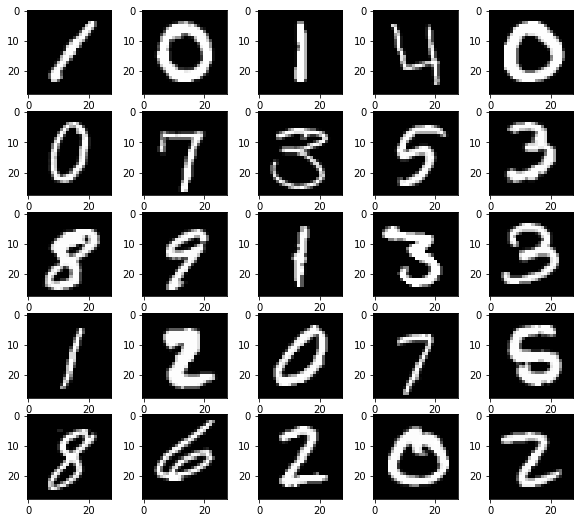

In [9]:
#Visualization of the testing data
plt.gray() # B/W Imagesplt.figure(figsize = (10,9)) # Adjusting figure size# Displaying a grid of 3x3 images
plt.figure(figsize = (10,9))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(numpyX[i].reshape(28,28))
    
numpyX = numpyX.astype('float32') 
numpyX = numpyX/255.

# 1.Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.


In [11]:
start=dt.datetime.now()
rfc = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
start=dt.datetime.now()
rfc.fit(X,y)
end=dt.datetime.now()
print('Time taken:',end-start)
labels = rfc.predict(testData)
trainDF = pd.DataFrame(labels, columns = ['Label'])
trainDF.index.name = 'ImageId'
trainDF.index += 1
trainDF.to_csv('predictions.csv')
trainDF
#Kaggle score: 0.96500; Username = Deemal Patel

Time taken: 0:00:03.969833


,Label
ImageId,
1,2
2,0
3,9
4,4
5,3
...,...
27996,9
27997,7
27998,3


# 2. Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in theexplanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.


In [14]:
combinedSet = pd.concat([X, testData])
combinedSet.reset_index(inplace=True)
combinedSet = combinedSet.drop('index',axis=1)

start=dt.datetime.now()
pca = PCA(n_components = 0.95000)
reducedSet = pca.fit_transform(combinedSet)
end=dt.datetime.now()
print('Time taken:', end-start)
print('Principal Components at 95% variability is',reducedSet.shape[1])

Time taken: 0:00:04.589094
Principal Components at 95% variability is 154


# 3. Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [18]:
pca2 = PCA(n_components = reducedSet.shape[1])
X_pca = pca2.fit_transform(X)
X_pca_test = pca2.fit_transform(testData)
rfc2 = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
start=dt.datetime.now()
rfc2.fit(X_pca,y)
end=dt.datetime.now()
print('Time taken:',end-start)

labels = rfc2.predict(X_pca_test)
trainDF = pd.DataFrame(labels, columns = ['Label'])
trainDF.index.name = 'ImageId'
trainDF.index += 1
trainDF.to_csv('predictions2.csv')
trainDF

#Kaggle score: 0.41303; Username = Deemal Patel

Time taken: 0:00:04.533265


,Label
ImageId,
1,6
2,0
3,9
4,0
5,4
...,...
27996,9
27997,3
27998,7


# 4. Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.


In [ ]:
rank = [0.965, 0.41303]
model = ['Random Forest Classifcation  (Standard)', 'Random Forest w/ PCA']
username = ['Deemal Patel','Deemal Patel']
scores = {'User':username, 'Score': rank, 'Model': model}
scoresDF = pd.DataFrame(scores)
scoresDF

# 5. The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. Provide your Kaggle.com score and user ID.

In [458]:
start = dt.datetime.now()
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X) 
end=dt.datetime.now()
print('Time taken:' , end-start)

Time taken: 0:00:03.674488


In [459]:
X_pca_train, X_pca_vld, y_pca_train, y_pca_vld= train_test_split(X_pca, y, train_size=32000,
                                                                 test_size=10000, random_state=1)
print(X_pca_train.shape)
print(X_pca_vld.shape)
print(y_pca_train.shape)
print(y_pca_vld.shape)

(32000, 154)
(10000, 154)
(32000,)
(10000,)


In [460]:
X_pca_trn, X_pca_tst, y_pca_trn, y_pca_tst = train_test_split(X_pca_train,y_pca_train, train_size = 0.7,
                                                              test_size =0.3, random_state=1)
print(X_pca_trn.shape)
print(X_pca_tst.shape)
print(y_pca_trn.shape)
print(y_pca_tst.shape) 

(22400, 154)
(9600, 154)
(22400,)
(9600,)


In [485]:
start_time = dt.datetime.now()
rfc_pca = RandomForestClassifier(n_estimators = 100, criterion='gini',
                                 max_features='sqrt', oob_score=True, bootstrap = True, random_state=1,n_jobs=-1)
# Train
rfc_pca= rfc_pca.fit(X_pca_trn, y_pca_trn)
print("Accuracy on training set: {:.3f}".format(rfc_pca.score(X_pca_trn,y_pca_trn)))
print("Accuracy on test set: {:.3f}".format(rfc_pca.score(X_pca_tst,y_pca_tst)))
f1 = f1_score(y_pca_trn, rfc_pca.predict(X_pca_trn),average='weighted')
f1_tst = f1_score(y_pca_tst, rfc_pca.predict(X_pca_tst),average='weighted')
f1_vld = f1_score(y_pca_vld, rfc_pca.predict(X_pca_vld),average='weighted')

print("f1: {:}".format(f1))
print("f1_tst: {:}".format(f1_tst))
print("f1_vld: {:}".format(f1_vld))
# Compare
print(classification_report(rfc_pca.predict(X_pca_trn), y_pca_trn))
print(classification_report(rfc_pca.predict(X_pca_tst), y_pca_tst))
print(classification_report(rfc_pca.predict(X_pca_vld), y_pca_vld))
end_time = dt.datetime.now()
runtime = end_time - start_time # seconds of wall-clock time
print(runtime) # report in milliseconds

Accuracy on training set: 1.000
Accuracy on test set: 0.937
f1: 1.0
f1_tst: 0.9366088748775784
f1_vld: 0.9366523358747832
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2168
           1       1.00      1.00      1.00      2528
           2       1.00      1.00      1.00      2225
           3       1.00      1.00      1.00      2311
           4       1.00      1.00      1.00      2166
           5       1.00      1.00      1.00      2080
           6       1.00      1.00      1.00      2204
           7       1.00      1.00      1.00      2332
           8       1.00      1.00      1.00      2182
           9       1.00      1.00      1.00      2204

    accuracy                           1.00     22400
   macro avg       1.00      1.00      1.00     22400
weighted avg       1.00      1.00      1.00     22400

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       965
          

In [490]:
labels = rfc_pca.predict(X_pca_train)
accuracy_score(y_pca_train, labels)

0.98103125

# 6. Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.

In [ ]:
#wcss = []
'''for i in range(1, 125):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)'''
plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(range(1, 125), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [510]:
numpyX = X.to_numpy()
numpyY = y.to_numpy()

<Figure size 864x864 with 0 Axes>

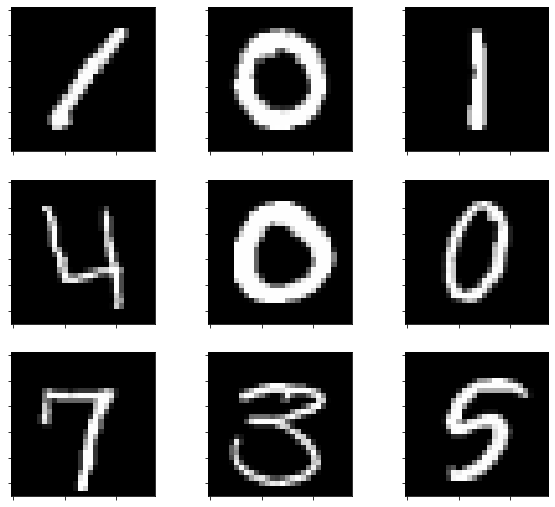

In [511]:
plt.gray() # B/W Imagesplt.figure(figsize = (10,9)) # Adjusting figure size# Displaying a grid of 3x3 images
plt.figure(figsize = (10,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(numpyX[i].reshape(28,28))
    
numpyX = numpyX.astype('float32') 
numpyX = numpyX/255.

In [512]:
for i in range(9):
    print(numpyY[i])

1
0
1
4
0
0
7
3
5


In [513]:
total_clusters = len(np.unique(numpyY))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

In [514]:
kmeans.fit(numpyX)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [515]:
kmeans.labels_

array([4, 7, 4, ..., 2, 6, 5], dtype=int32)

In [516]:
def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range (len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels ==i,1,0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [517]:
print(retrieve_info(kmeans.labels_,numpyY))

{0: 8, 1: 3, 2: 7, 3: 0, 4: 1, 5: 9, 6: 6, 7: 0, 8: 6, 9: 2}


In [518]:
reference_labels = retrieve_info(kmeans.labels_,numpyY)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [519]:
print(number_labels[:20].astype('int'))
print(numpyY[:20])

[1 0 1 2 0 2 7 1 3 3 7 7 1 3 3 1 8 0 7 3]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5]


In [520]:
print(accuracy_score(number_labels,numpyY))

0.5259047619047619


OPTIMIZING KMEANS

In [536]:
kmeans = MiniBatchKMeans(n_clusters = 255, random_state = 42)
kmeans.fit(numpyX)
reference_labels = retrieve_info(kmeans.labels_,numpyY)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
accuracy_score(number_labels,numpyY)

0.8996428571428572

In [537]:
centroids = kmeans.cluster_centers_

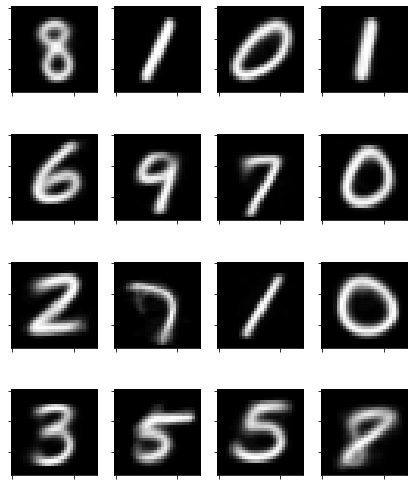

In [538]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title(reference_labels[i])
    plt.imshow(centroids[i].reshape(28,28))

In [524]:
reference_labels

{0: 8,
 1: 1,
 2: 0,
 3: 1,
 4: 6,
 5: 9,
 6: 7,
 7: 0,
 8: 2,
 9: 7,
 10: 1,
 11: 0,
 12: 3,
 13: 5,
 14: 5,
 15: 8,
 16: 4,
 17: 9,
 18: 2,
 19: 6,
 20: 4,
 21: 4,
 22: 8,
 23: 5,
 24: 2,
 25: 3,
 26: 0,
 27: 6,
 28: 4,
 29: 6,
 30: 1,
 31: 1,
 32: 2,
 33: 7,
 34: 3,
 35: 5,
 36: 6,
 37: 5,
 38: 5,
 39: 7,
 40: 3,
 41: 4,
 42: 7,
 43: 0,
 44: 0,
 45: 2,
 46: 2,
 47: 8,
 48: 0,
 49: 9,
 50: 6,
 51: 7,
 52: 6,
 53: 6,
 54: 4,
 55: 4,
 56: 8,
 57: 0,
 58: 8,
 59: 0,
 60: 9,
 61: 3,
 62: 6,
 63: 3,
 64: 1,
 65: 0,
 66: 3,
 67: 9,
 68: 9,
 69: 0,
 70: 9,
 71: 5,
 72: 4,
 73: 5,
 74: 6,
 75: 7,
 76: 1,
 77: 0,
 78: 7,
 79: 7,
 80: 2,
 81: 0,
 82: 1,
 83: 8,
 84: 1,
 85: 8,
 86: 8,
 87: 3,
 88: 9,
 89: 0,
 90: 6,
 91: 6,
 92: 1,
 93: 7,
 94: 0,
 95: 9,
 96: 5,
 97: 5,
 98: 5,
 99: 2,
 100: 4,
 101: 8,
 102: 2,
 103: 2,
 104: 7,
 105: 0,
 106: 5,
 107: 5,
 108: 7,
 109: 2,
 110: 0,
 111: 7,
 112: 0,
 113: 0,
 114: 4,
 115: 1,
 116: 7,
 117: 4,
 118: 2,
 119: 6,
 120: 2,
 121: 2,
 122: 6,
 12

# Management Problem

1. We begin by exploring the data within this dataset. We can see that that the training data set contains 42000 rows of data and 784 columns of explanatory variables. Each column represent a single pixel of the image and each image is a 28 x 28 pixel. For the sake of sanity for the KMeans clustering towards the end we convert the training data and its label to numpy arrays making it easier to create the labels in the end.

2. There are a few modeling methods that we want to try to implement within in dataset. We want to try with a Random Forest Classifcation algorithm with standard settings and see how well the algorithm performs. The issue here is that using all 784 explanatory variables can definitely be a long process therefore we want to perform some dimensionality reduction in order to speed up the process. We may lose a little bit of accuracy but the cost of which the time it takes for the algorithm to work far exceeds the a minor change in accuracy percentage. We can explore using a Principal Component Analysis, or PCA, to perform such dimensionality reduction in order to determine the number of components we can use to main a 95% variability for our data. Meaning we would only lose 5% of the data but that 5% isn't very crucial to the end result that we want to achieve.

3. From the first model we can see that the testing data was able to achieve a score of 0.964. This means that we were able to classify the correct number to the image correctly for 96% of the data. This is a very good score but there is definitely room for improvement. The testing data set contains around 28000 rows meaning the Random Forest Classifier incorrectly labeled over 1000 rows. This can definitely be a lot once the data set size gets even bigger. Our PCA model ran with the Random Forest Classification created a significantly smaller score of 0.41

4. Our first Model used a Random Forest Classification with standard settings. This is our base case to see how well the model performs without and sort of modifications or hypertuning done to it. As we saw it came with a score of 0.964. Meaning it did a very good job classifying the test data. As we know,  we may lose a little bit of accuracy but the cost of which the time it takes for the algorithm to work far exceeds the a minor change in accuracy percentage so we do a PCA on the combined training and test data. This gives us a component number of 154 meaning out of the 784 explanatory variables, 154 of will provide a variability of 95%. We use this with our PCA and retrain the data. The score came out significantly lower than the first model but this is becasue there is a major flaw with what we performed.

5. As the manager of the data science team I would recommend looking in to using a PCA as a premliminary because PCA can provide advantages such as shorter computation which would saves costs. In the testing case even with using PCA, we were able to get accuracy scores of around 94% or more for our training, testing, and holding sets. This is a very good accuracy score to use for the team.